1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

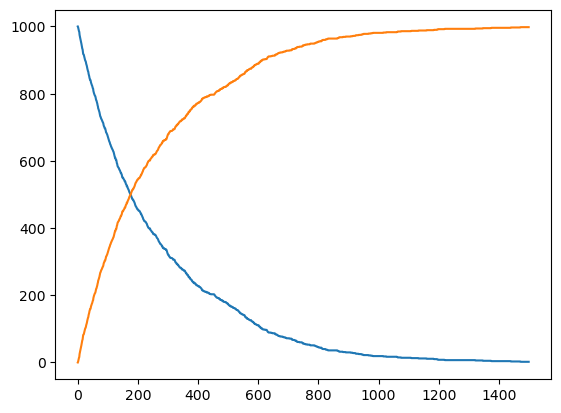

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
import math

time = np.arange(1500)
tau = 3.052*60
N = 1000

prob = np.random.uniform(0, 1, size=(N,))

Ti = []
Pb = []

for t in time:
    n_decay = np.sum(prob < 1 - pow(2,-t/tau))
    Ti.append(N-n_decay)
    Pb.append(n_decay)

plt.plot(time,Ti)
plt.plot(time,Pb)
plt.show()

z comes from an uniform distribution between 0 and 1. I want to create a distribution thai is able to follow the pdf:

$$
p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}
$$

$$
\int_{0}^{x(z)} p(x') dx' = -2^{-\frac{t(z)}{\tau}}+1 = z
$$

and thus:

$$
t(z) = - \tau log_2 (1-z)
$$

if we simulate z (with uniforme distribution) using this formula we are able to simulate the distribution of x 
that follow the distribution p(x).

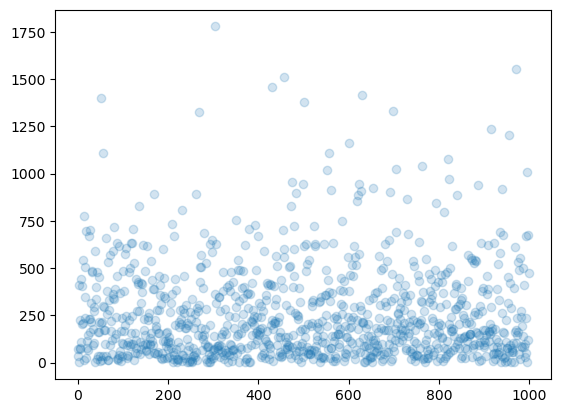

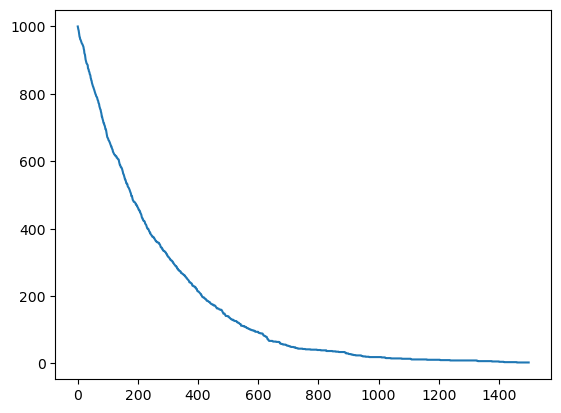

In [2]:
z = np.random.uniform(0, 1, size=(N,))
t_decay = -tau * np.log2(1-z)

plt.scatter(np.arange(N),t_decay, alpha=0.2)
plt.show()

Ti = []

for t in time:
    Ti.append(np.sum(t_decay>t))
    
plt.plot(time,Ti)
plt.show()
    

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

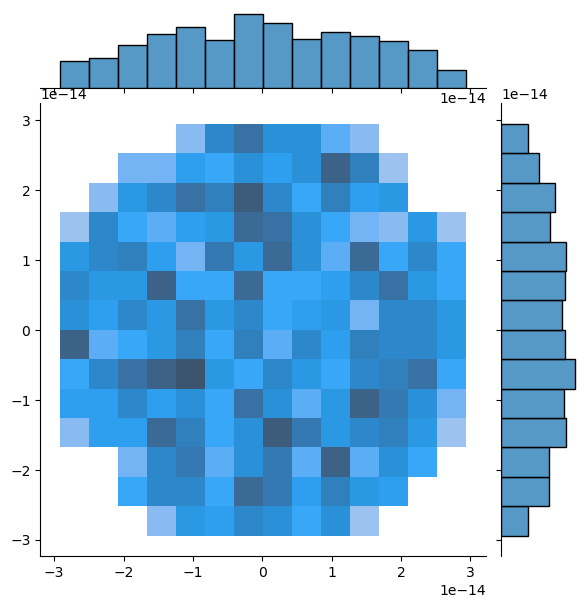

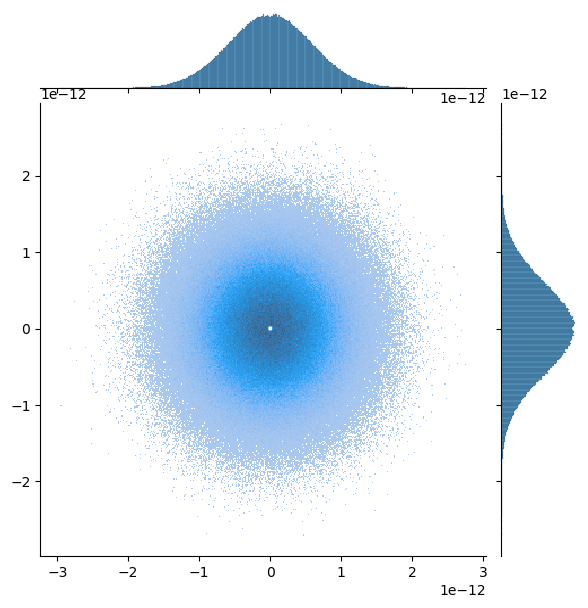

Particelle scatterate con angolo maggiore di pi/2: 1266
Percentuale di particelle scatterate con angolo maggiore di pi/2: 0.1266


In [10]:
# std physical constants
a0 =  5.9e-11   # [m]
e  = -1.6e-19   # [C]

# simulation parameters
E = 7.7     # Energy of the beam [MeV]
Z = 79      # Target Z (gold)
N = int(1e7)
sigma = a0/100
E *= abs(e) * 1e6   #    converting E to Joule

def tetha(b, E, Z): return 2*np.arctan((Z*(1.6*10**(-19))**2)/(2*np.pi*(8.85*10**(-12)*E*b)))

x = np.random.normal(0, sigma, 10**6)
y = np.random.normal(0, sigma, 10**6)
b = np.sqrt(x**2+y**2)
mask = np.abs(tetha(b, E, Z)) > np.pi/2
opposite_mask = np.logical_xor(mask, np.ones(10**6))


sns.jointplot(x=x[mask], y=y[mask], kind="hist")
sns.jointplot(x=x[opposite_mask], y=y[opposite_mask], kind="hist")
plt.show()
print('Particelle scatterate con angolo maggiore di pi/2:', np.sum(mask))
print('Percentuale di particelle scatterate con angolo maggiore di pi/2:', np.sum(mask)/10**4)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return (np.sin(1/(x*(2-x)))**2)

# Metodo 1
N = 1000000
count = 0
for i in range(N):
    x = 2 * np.random.random()
    y = np.random.random()
    if y < f(x): count += 1
        
I_1 = 2*count/N
err_1 = 2*1*np.sqrt(count)/N
# err = x_delta*y_delta*np.sqrt(hits)/N
print('hit-miss   ->', I_1, '+-', err_1)


# Metodo 2
x = np.linspace(0,2,N)
somma = np.sum(f(x[1:N-1]))
I_2 = 2 / N * somma
err_2 = 2*1*np.sqrt(np.var(f(x[1:N-1]))/(N-2))
# err = x_delta*y_delta*np.sqrt( np.var(f(x))/N )
print('mean value ->', I_2, '+-', err_2)

hit-miss   -> 1.451718 +- 0.0017039471822800141
mean value -> 1.4514239444599435 +- 0.0005271037221692562


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
# Using mean value method

import numpy as np

def f(x):
    return int(np.sum(x**2)<=1)

def Vol(f, dim, N):
    x = 2*np.random.uniform(0, 1, size=(dim, N))-1
    somma = np.array([f(x[:,i]) for i in range(x.shape[1])]).sum()
    I = 2**(dim)/N*somma
    print('La sfera di dim:', dim, 'ha volume =', I, '\n')
    
    
Vol(f, 2, 10**5)
Vol(f, 10, 10**5) 

La sfera di dim: 2 ha volume = 3.1368400000000003 

La sfera di dim: 10 ha volume = 2.78528 



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [9]:
N = 10**5

def w(x):
    return 1/np.power(x, 1/2) 

def f(x):
    return pow(x,-1/2)/(pow(math.e,x)+1)

x = np.random.random(N,)
somma_w = np.sum(w(x))
x = x**2
somma_f_su_w = np.sum(f(x)/w(x))
    
I = (1/N) * somma_f_su_w * (somma_w*(1/N))

print(I)



0.8459196360668223
